woojin choi 109992127 hyuk joon kwon 109822712 

<h3>Importing the Data</h3>

In [4]:
import pandas as pd
cancer_df = pd.read_csv('TCGA_CODA.txt',sep="\t",header = 0)
#cancer = np.loadtxt('TCGA_CODA.txt', delimiter='\t')
#d = np.genfromtxt('TCGA_CODA.txt', dtype=None)
cancer_df = cancer_df.set_index('gene')
cancer_df.head()


,TCGA-3L-AA1B-01,TCGA-4N-A93T-01,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-5M-AAT6-01,TCGA-5M-AATA-01,TCGA-5M-AATE-01,TCGA-A6-2671-11,TCGA-A6-2675-11,...,TCGA-AA-A03J-01,TCGA-AY-4070-01,TCGA-AY-4071-01,TCGA-AZ-4308-01,TCGA-AZ-4681-01,TCGA-CM-4746-01,TCGA-CM-4748-01,TCGA-CM-4750-01,TCGA-CM-4752-01,TCGA-CM-5341-01
gene,,,,,,,,,,,,,,,,,,,,,
?|100133144,4.176730,2.147795,3.307356,2.985027,3.615475,1.986848,2.855312,3.539655,1.755016,1.812991,...,3.079224,3.474215,5.776049,3.653289,3.611727,4.866498,NaN,4.740544,3.344701,3.636439
?|100134869,3.978562,2.096498,3.498659,4.229649,4.384229,3.913339,3.517439,2.787850,2.741489,2.824381,...,6.296222,6.288257,5.755165,4.009580,4.086512,5.153291,NaN,5.746960,NaN,4.883723
?|10357,7.173931,7.156446,7.161875,7.191677,8.036234,7.834483,6.956923,7.911179,5.915636,6.996388,...,8.248370,8.993474,8.661944,8.108653,9.233566,8.195113,8.333840,9.026989,9.385541,9.997235
?|10431,9.597422,10.211028,9.794936,10.322549,10.344122,9.885141,9.964637,9.245194,9.352416,9.365859,...,10.177412,9.242739,9.910934,10.109188,10.806559,10.531792,9.560528,10.587058,10.563866,11.117283
?|155060,8.787814,9.027941,8.170247,8.568025,8.126479,7.677689,8.484825,9.205484,5.330974,6.307372,...,8.578236,8.626387,7.799592,8.452899,6.377577,5.720027,7.158429,6.784352,7.324519,4.975837


<h3>Shape of the data after dropping certain values</h3>

We can use fillna with the average value but since we are subsetting 2000 genes in the first place why not just drop all the missing genes and use only the genes with that contain all the data

In [5]:
import numpy as np
#print(cancer_df.tail())
print(cancer_df.shape)

cancer_drop = cancer_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print(cancer_drop.shape)
cancer_drop.head()

(18042, 500)
(10820, 500)


,TCGA-3L-AA1B-01,TCGA-4N-A93T-01,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-5M-AAT6-01,TCGA-5M-AATA-01,TCGA-5M-AATE-01,TCGA-A6-2671-11,TCGA-A6-2675-11,...,TCGA-AA-A03J-01,TCGA-AY-4070-01,TCGA-AY-4071-01,TCGA-AZ-4308-01,TCGA-AZ-4681-01,TCGA-CM-4746-01,TCGA-CM-4748-01,TCGA-CM-4750-01,TCGA-CM-4752-01,TCGA-CM-5341-01
gene,,,,,,,,,,,,,,,,,,,,,
?|10357,7.173931,7.156446,7.161875,7.191677,8.036234,7.834483,6.956923,7.911179,5.915636,6.996388,...,8.248370,8.993474,8.661944,8.108653,9.233566,8.195113,8.333840,9.026989,9.385541,9.997235
?|10431,9.597422,10.211028,9.794936,10.322549,10.344122,9.885141,9.964637,9.245194,9.352416,9.365859,...,10.177412,9.242739,9.910934,10.109188,10.806559,10.531792,9.560528,10.587058,10.563866,11.117283
?|155060,8.787814,9.027941,8.170247,8.568025,8.126479,7.677689,8.484825,9.205484,5.330974,6.307372,...,8.578236,8.626387,7.799592,8.452899,6.377577,5.720027,7.158429,6.784352,7.324519,4.975837
?|57714,8.701633,7.503209,8.614285,8.691783,8.085035,9.438046,9.235496,9.051616,7.982025,8.971406,...,8.710101,8.883918,8.590558,8.079441,5.868563,7.848133,8.438537,8.386541,8.081662,5.506351
?|653553,8.166083,9.109808,7.777014,5.922942,6.967366,7.596858,7.216337,7.440284,8.289043,8.744464,...,9.838888,9.506172,9.882706,10.202465,10.170938,9.263170,10.233717,8.935380,8.588400,9.540622


<h3>Selecting 50 patients and 2000 genes randomly for classification</h3>

In [6]:
sample_patient = np.random.choice(500,replace=False, size=50)
sample_gene = np.random.choice(10820,replace=False, size=2000)
sample_patient

cancer_trimmed = cancer_drop.iloc[sample_gene, sample_patient]
print(cancer_trimmed.shape)
cancer_trimmed.head()

(2000, 50)


,TCGA-AA-3852-01,TCGA-AA-3966-01,TCGA-AD-6963-01,TCGA-CK-5914-01,TCGA-G4-6299-01,TCGA-CA-5797-01,TCGA-CM-6161-01,TCGA-AA-A00K-01,TCGA-AA-3697-11,TCGA-F4-6569-01,...,TCGA-CM-6172-01,TCGA-AA-A01Q-01,TCGA-AA-3663-01,TCGA-AA-3715-01,TCGA-DM-A1DA-01,TCGA-AA-A00U-01,TCGA-AA-3994-01,TCGA-CK-5915-01,TCGA-AA-3660-11,TCGA-AA-3831-01
gene,,,,,,,,,,,,,,,,,,,,,
TMEM158|25907,8.828263,8.739226,7.957150,7.477433,6.605275,7.298517,7.334998,7.958516,7.077509,7.965339,...,7.026018,6.481691,6.994042,8.978701,4.855651,8.883147,8.047421,7.626454,5.890269,8.642027
FAM131A|131408,8.123865,7.888891,7.587577,7.490489,7.905468,7.920517,7.524770,7.416623,8.162795,7.995862,...,6.700247,8.016027,5.244586,8.065636,7.145520,7.914308,8.659496,7.525760,8.620238,8.140035
EXOG|9941,6.792244,6.990531,6.847096,7.167748,7.139933,6.682528,7.231905,7.057080,6.599462,6.772695,...,6.744448,7.577906,7.000248,5.402671,7.187061,7.436261,6.719616,7.090888,6.427926,7.087247
NEAT1|283131,12.730931,13.307790,12.528035,12.424206,12.821908,10.163655,11.392207,13.065350,11.966097,10.189595,...,11.598563,13.482079,11.864620,11.064581,12.409398,12.583102,11.121715,11.574257,12.266991,12.515387
SNAP23|8773,9.976506,10.611835,9.761007,10.728463,9.935941,10.808522,11.208075,9.543479,11.200171,10.587006,...,10.899789,10.370224,11.413349,9.018471,9.819533,9.265530,10.819152,10.291295,11.391743,10.316664


<h3>Clustering the genes into 20 clusters initially</h3>

In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=20)
model.fit(cancer_trimmed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
labels = model.predict(cancer_trimmed)
cancer_trimmed.index
kmeans_data = pd.DataFrame({'Gene': cancer_trimmed.index, 'Cluster number':labels})
#kmeans_data.columns = ['Gene']
#kmeans_data.rename_axis('Cluster')
kmeans_data.head()

,Gene,Cluster number
0,TMEM158|25907,10
1,FAM131A|131408,14
2,EXOG|9941,3
3,NEAT1|283131,6
4,SNAP23|8773,18


<h3>The number of Genes in each Cluster</h3>

In [10]:
pd.pivot_table(kmeans_data,index="Cluster number", aggfunc='count')

,Gene
Cluster number,
0,115
1,61
2,242
3,69
4,18
5,15
6,62
7,175
8,61


<h3>Plotting the center of each cluster</h3>

In [8]:
import matplotlib.pyplot as plt

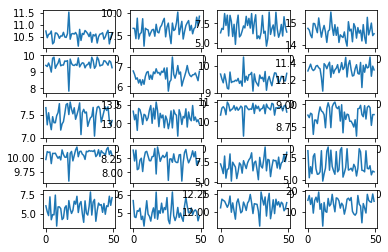

In [9]:
centers = pd.DataFrame(model.cluster_centers_.T)

#print(centers)

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.plot(centers[i])
plt.show()

We extracted two patients and drew a graph. It seems to be a little hard to cluster the genes to just 20 clusters

[]

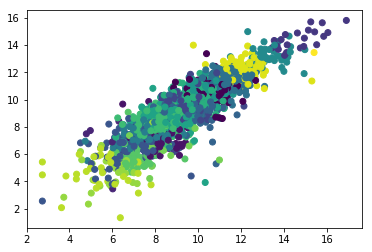

In [10]:
xs = cancer_trimmed.iloc[:,0]
ys = cancer_trimmed.iloc[:,2]
import matplotlib.pyplot as plt
plt.scatter(xs,ys, c=labels)
plt.plot()

<h4>So the question is what is the optimal number of clusters one should use. We can plot the inertia plot to find the optimal number of clusters. There is no real Elbow so its a little hard to decide but I belive 40 would be a decent value for a cluster</h4>

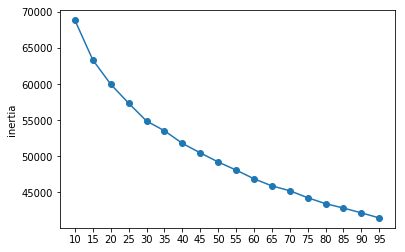

In [11]:
ks = range(10,100,5)
inertias = []
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(cancer_trimmed)
    inertias.append(model.inertia_)
    
plt.plot(ks,inertias,'-o')
plt.ylabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

<h3>For the next step we are going to cluster patients using hierarchical clustering. Since clustering happens on the rows lets transpose the matrix

In [12]:
cancer_transpose = cancer_trimmed.transpose()
cancer_transpose.shape
patient_names = list(cancer_transpose.index)
print(patient_names)
print(len(patient_names))

['TCGA-AA-3858-01', 'TCGA-CA-5254-01', 'TCGA-T9-A92H-01', 'TCGA-AZ-6599-11', 'TCGA-AA-A029-01', 'TCGA-AA-3522-01', 'TCGA-AZ-4315-01', 'TCGA-A6-2679-11', 'TCGA-AA-A02Y-01', 'TCGA-CM-6677-01', 'TCGA-AA-3970-01', 'TCGA-CK-6746-01', 'TCGA-CA-5255-01', 'TCGA-AD-6889-01', 'TCGA-AA-3984-01', 'TCGA-AA-3534-01', 'TCGA-DM-A1D9-01', 'TCGA-AA-3527-01', 'TCGA-AA-3526-01', 'TCGA-QG-A5Z2-01', 'TCGA-A6-6780-01', 'TCGA-AA-3850-01', 'TCGA-AZ-6600-01', 'TCGA-A6-A565-01', 'TCGA-AA-3955-01', 'TCGA-AA-A00F-01', 'TCGA-A6-5659-11', 'TCGA-QL-A97D-01', 'TCGA-DM-A1D0-01', 'TCGA-AA-A00O-01', 'TCGA-AZ-4616-01', 'TCGA-AD-A5EJ-01', 'TCGA-D5-6541-01', 'TCGA-D5-6534-01', 'TCGA-CM-5862-01', 'TCGA-AU-3779-01', 'TCGA-AA-3531-11', 'TCGA-DM-A28C-01', 'TCGA-AA-3846-01', 'TCGA-AA-3982-01', 'TCGA-G4-6299-01', 'TCGA-CM-5863-01', 'TCGA-AY-6197-01', 'TCGA-AA-3866-01', 'TCGA-AA-3675-01', 'TCGA-A6-6137-01', 'TCGA-F4-6854-01', 'TCGA-AA-3489-11', 'TCGA-CK-4947-01', 'TCGA-F4-6569-01']
50


<h4>If we see the graph above we can see the patient names and the clustering that happens. We don't want too many clusters and we also don't want too less since that defeats the purpose of clustering. I believe cutting at 60 would be reasonable</h4>

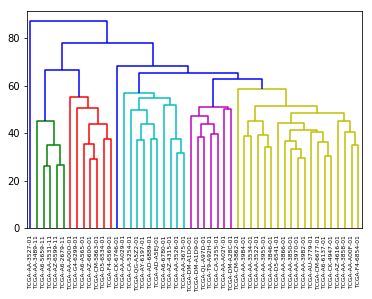

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(cancer_transpose,method='complete')
dendrogram(mergings,
           labels=patient_names,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

<h2>Principle component analysis on paitens</h2>

In [14]:
cancer_trimmed.head()

,TCGA-AA-3858-01,TCGA-CA-5254-01,TCGA-T9-A92H-01,TCGA-AZ-6599-11,TCGA-AA-A029-01,TCGA-AA-3522-01,TCGA-AZ-4315-01,TCGA-A6-2679-11,TCGA-AA-A02Y-01,TCGA-CM-6677-01,...,TCGA-G4-6299-01,TCGA-CM-5863-01,TCGA-AY-6197-01,TCGA-AA-3866-01,TCGA-AA-3675-01,TCGA-A6-6137-01,TCGA-F4-6854-01,TCGA-AA-3489-11,TCGA-CK-4947-01,TCGA-F4-6569-01
gene,,,,,,,,,,,,,,,,,,,,,
CUX1|1523,11.506138,10.918141,11.365568,11.564224,12.177483,11.219010,9.705330,11.338629,11.377801,11.371021,...,10.626191,12.062056,10.623961,11.111215,11.351510,11.448379,12.407735,10.849591,11.236320,11.976567
CTU1|90353,8.142556,6.593953,7.454762,5.883552,8.412265,5.703162,5.125705,6.134677,7.059821,6.704117,...,6.846802,6.182168,6.374911,6.822612,6.556538,6.310733,7.033479,4.181150,5.005476,5.739781
FAM40A|85369,9.496193,8.781993,9.578995,9.575431,9.191666,8.763143,9.310767,9.617926,9.490718,9.635775,...,9.273200,9.188127,9.580711,8.939836,9.418341,9.644355,9.769680,9.110408,9.573734,9.546342
B3GAT3|26229,9.326981,9.190186,9.445216,9.145431,9.288690,8.723434,9.272103,9.200464,9.437262,9.660125,...,9.190238,9.214059,9.519344,9.351597,8.972731,8.992992,9.682683,8.857106,8.540548,9.447033
DEF8|54849,9.997016,10.012698,9.999379,9.039850,9.992434,9.267562,9.391778,9.277252,9.596834,9.218690,...,9.769196,9.117441,9.516125,9.465104,9.662738,9.372307,9.838098,9.822298,9.052171,9.609955


<h3>There is only one dominant cluster</h3>

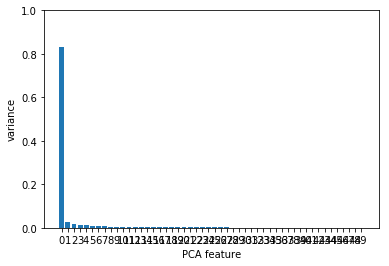

[8.33752140e-01 2.60236101e-02 1.69630456e-02 1.43317157e-02
 1.20003510e-02 9.73095075e-03 7.70470579e-03 6.45069483e-03
 5.62769368e-03 5.29524859e-03 4.21074705e-03 3.77204319e-03
 3.57224533e-03 3.22749624e-03 3.15886609e-03 2.82648156e-03
 2.71692277e-03 2.47030097e-03 2.19357044e-03 2.16308591e-03
 2.05880621e-03 1.97705008e-03 1.88925796e-03 1.77903905e-03
 1.73199633e-03 1.48033284e-03 1.44793883e-03 1.40489617e-03
 1.33055266e-03 1.25637339e-03 1.19651875e-03 1.15322224e-03
 1.11939421e-03 1.05204483e-03 1.01084576e-03 9.55322712e-04
 9.16069212e-04 8.42807622e-04 8.08986633e-04 7.91797846e-04
 7.26330614e-04 7.07251315e-04 6.33064533e-04 6.10616894e-04
 5.93694235e-04 5.68311740e-04 4.96808295e-04 4.67491848e-04
 4.19539500e-04 3.81721676e-04]


In [15]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
X = cancer_trimmed
#print(X)
pca = PCA()
pca.fit(X)
features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel("variance")
plt.xlabel("PCA feature")
plt.ylim((0,1))
plt.show()
print(pca.explained_variance_ratio_)

For Visualization purposes we choose two principle components

In [16]:
pca = PCA(n_components = 2)
pca.fit(X)
transformed = pca.transform(X)
print(transformed.shape)

(2000, 2)


It seems like the X axis is the principle component axis and Y is the arbitray axis. The data seems to be nicely separated when we color it with the clusters

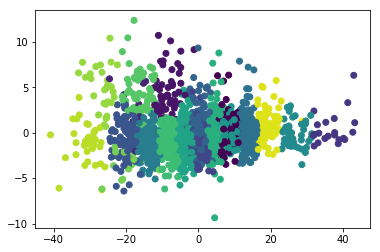

In [17]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=labels)

<h2>Part 2</h2>

We first import our data and transpose the data since we will be using the patients for classification

In [2]:
import pandas as pd
import numpy as np
import scipy.io
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
filename = 'CSE391_classificatin_project.mat'
mat = scipy.io.loadmat(filename)
#print(type(mat))
#print(type(mat['X']))
#print(type1.shape)


type1 = mat['X'].transpose()
type2 = mat['Y'].transpose()

df1 = pd.DataFrame(type1)
df2 = pd.DataFrame(type2)

print(df1.shape)
print(df2.shape)



(250, 200)
(250, 200)


We make two values c1 and c2. c1 will contain values of 0's and c2 will contain the values of ones. These will be the values we will be predicting. If the prediction is zero it will be a type 1 breast cancer. If the prediction is a one it will be type 2 breast cancer. 

In our first step we split the two datas so that 200 patients are used for training and 50 patients are used for testing

In [3]:
#df1.insert(200,"Type",0)
#df2.insert(200,"Type",1)

c1 = pd.DataFrame(np.zeros(250))
c2 = pd.DataFrame(np.ones(250))

#print(df1.head())

print(df1.shape)
print(df2.shape)

type1_train, type1_test, c1_train, c1_test = train_test_split(df1,c1,test_size = 0.2)
type2_train, type2_test, c2_train, c2_test = train_test_split(df2,c2,test_size = 0.2)

#print(type(c1_train))
#print(type(type1_train))

print(type1_train.shape)
print(type2_train.shape)

(250, 200)
(250, 200)
(200, 200)
(200, 200)


Now we merge the frames together. frames 1 will contain 400 values of the patients. frames 2 will contain 400 values of the predictor variables. frames 3 will contain the 100 testing values of patients and frames 4 will contain the testing values of predictor variables

In [20]:
frames6 = [df1,df2]
X = pd.concat(frames6)
#print(X.shape)

frames7 = [c1,c2]
y = pd.concat(frames7)
#print(y.shape)

frames1 = [type1_train,type2_train]
X_train = pd.concat(frames1)
#print(X_train.head())

frames2 = [c1_train, c2_train]
y_train = pd.concat(frames2)
#print(y_train.head())

frames3 = [type1_test, type2_test]
X_test = pd.concat(frames3)

#print(X_test.head())

frames4 = [c1_test,c2_test]
y_test = pd.concat(frames4)

#classifier = svm.SVC(kernel='linear', C = 0.01)
classifier = svm.SVC()
y_pred = classifier.fit(X_train,y_train).predict(X_test)

print(y_pred)

cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
cnf_matrix



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


C:\Users\bluec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[47,  3],
       [ 0, 50]], dtype=int64)

<h3>Performance Evaluation</h3>

In [21]:
print("Test score")
print(classifier.score(X_test,y_test))

print(type(y_test.values.ravel()))

from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_test.values.ravel(),y_pred)
cm.print_stats()


Test score
0.97
<class 'numpy.ndarray'>
population: 100
P: 50
N: 50
PositiveTest: 53
NegativeTest: 47
TP: 50
TN: 47
FP: 3
FN: 0
TPR: 1.0
TNR: 0.94
PPV: 0.9433962264150944
NPV: 1.0
FPR: 0.06
FDR: 0.05660377358490566
FNR: 0.0
ACC: 0.97
F1_score: 0.970873786407767
MCC: 0.9416965821485117
informedness: 0.94
markedness: 0.9433962264150944
prevalence: 0.5
LRP: 16.666666666666668
LRN: 0.0
DOR: inf
FOR: 0.0


C:\Users\bluec\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:346: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.LRP) / self.LRN)


Confusion matrix, without normalization
[[47  3]
 [ 0 50]]


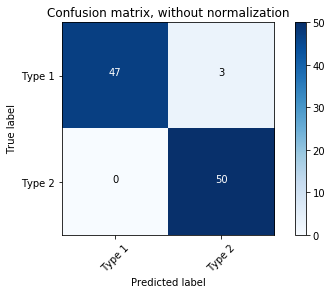

In [22]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Type 1','Type 2'],
                      title='Confusion matrix, without normalization')

<h3>Using Cross Validation</h3>

In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
a = y_train.values.flatten()
#print(a)
print(a.shape)
predicted = cross_val_predict(classifier, X, y, cv=5)
cnf_matrix2 = confusion_matrix(y,predicted)
cnf_matrix2

(400,)


C:\Users\bluec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bluec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bluec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bluec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([[226,  24],
       [  0, 250]], dtype=int64)

Confusion matrix, without normalization
[[226  24]
 [  0 250]]


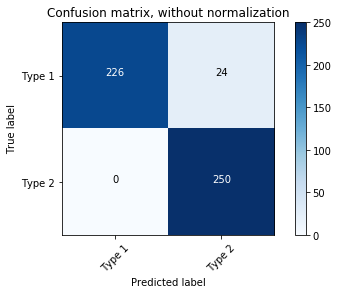

In [24]:
plot_confusion_matrix(cnf_matrix2, classes=['Type 1','Type 2'],
                      title='Confusion matrix, without normalization')